In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sopt
import scipy.stats as stats
from scipy.stats import anderson

In [2]:
datos=pd.read_excel('Datos.xlsx')

In [3]:
datos=datos.dropna()

In [4]:
datos.head()

,Datos destilación,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
2,"Volumen evaporado, %","tiempo, s","Temperatura de destilación, °C","Volumen evaporado, %",tiempo,Temperatura de destilación,"Volumen evaporado, %",tiempo,Temperatura de destilación,"Volumen evaporado, %",tiempo,Temperatura de destilación
3,Primera gota,375,26.6,Primera gota,376,29.6,Primera gota,379,28.4,Primera gota,375,30.8
4,5,460,43.5,5,458,45.8,5,459,44.3,5,465,47.4
5,10,529.7,50.2,10,529.4,52.6,10,530.4,51,10,536.4,52.3
6,15,599.5,55.7,15,599.1,58,15,601.8,56.8,15,607.8,58.3


In [5]:
datosCorrida1=pd.concat([datos['Datos destilación'],datos['Unnamed: 1'],datos['Unnamed: 2']],axis=1)
datosCorrida2=pd.concat([datos['Unnamed: 3'],datos['Unnamed: 4'],datos['Unnamed: 5']],axis=1)
datosCorrida3=pd.concat([datos['Unnamed: 6'],datos['Unnamed: 7'],datos['Unnamed: 8']],axis=1)
datosCorrida4=pd.concat([datos['Unnamed: 9'],datos['Unnamed: 10'],datos['Unnamed: 11']],axis=1)

In [6]:
datosCorrida2.head()

,Unnamed: 3,Unnamed: 4,Unnamed: 5
2,"Volumen evaporado, %",tiempo,Temperatura de destilación
3,Primera gota,376,29.6
4,5,458,45.8
5,10,529.4,52.6
6,15,599.1,58


In [7]:
datosCorrida1.columns=datosCorrida1.iloc[0]
datosCorrida2.columns=datosCorrida2.iloc[0]
datosCorrida3.columns=datosCorrida3.iloc[0]
datosCorrida4.columns=datosCorrida4.iloc[0]

In [8]:
datosCorrida1=datosCorrida1.drop(2,axis=0)
datosCorrida2=datosCorrida2.drop(2,axis=0)
datosCorrida3=datosCorrida3.drop(2,axis=0)
datosCorrida4=datosCorrida4.drop(2,axis=0)

In [9]:
datosCorrida1.head()

2,"Volumen evaporado, %","tiempo, s","Temperatura de destilación, °C"
3,Primera gota,375,26.6
4,5,460,43.5
5,10,529.7,50.2
6,15,599.5,55.7
7,20,674.5,61.4


In [10]:
datosCorrida1.index=[i for i in range(len(datosCorrida1))]
datosCorrida2.index=[i for i in range(len(datosCorrida2))]
datosCorrida3.index=[i for i in range(len(datosCorrida3))]
datosCorrida4.index=[i for i in range(len(datosCorrida4))]

In [11]:
datosCorrida2.head()

2,"Volumen evaporado, %",tiempo,Temperatura de destilación
0,Primera gota,376,29.6
1,5,458,45.8
2,10,529.4,52.6
3,15,599.1,58
4,20,676.1,63.6


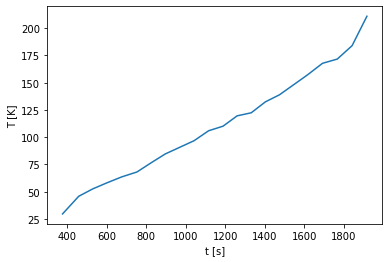

In [12]:
plt.plot(datosCorrida2['tiempo'],datosCorrida2['Temperatura de destilación'])
plt.xlabel('t [s]')
plt.ylabel('T [K]')
plt.show()

In [13]:
datosCorrida1['Volumen evaporado, %'][0]=0.1
datosCorrida2['Volumen evaporado, %'][0]=0.1
datosCorrida3['Volumen evaporado, %'][0]=0.1
datosCorrida4['Volumen evaporado, %'][0]=0.1

In [14]:
datosCorrida3.head()

2,"Volumen evaporado, %",tiempo,Temperatura de destilación
0,0.1,379,28.4
1,5,459,44.3
2,10,530.4,51
3,15,601.8,56.8
4,20,676.8,62.3


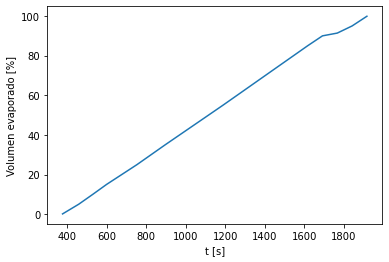

In [15]:
plt.plot(datosCorrida2['tiempo'],datosCorrida2['Volumen evaporado, %'])
plt.xlabel('t [s]')
plt.ylabel('Volumen evaporado [%]')
plt.show()

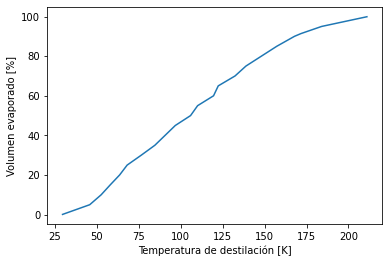

In [16]:
plt.plot(datosCorrida2['Temperatura de destilación'],datosCorrida2['Volumen evaporado, %'])
plt.xlabel('Temperatura de destilación [K]')
plt.ylabel('Volumen evaporado [%]')
plt.show()

# Modelo empírico polinomial

Para la temperatura como función del tiempo, se observa que existe cierta linealidad; sin embargo, podría expandirse un polinomio de grado mayor, lo que permitiría aumentar el ajuste, de esta forma, se escoge un polinomio de ajuste de la forma:

$$T(t)=At^3+Bt^2+Ct+D$$

In [17]:
tiempo,temperatura=np.asarray(datosCorrida2['tiempo']).astype('float64'),np.asarray(datosCorrida2['Temperatura de destilación']+273.15).astype('float64')

In [18]:
sd2=(temperatura-temperatura.mean()).sum()**2/(1*(len(temperatura)-1))
sd2

9.8473882446789e-27

In [19]:
def TPolinomio(t,A,B,C,D):
    return A*t**3+B*t**2+C*t+D

In [20]:
coefsP,covP=sopt.curve_fit(TPolinomio,tiempo,temperatura)
ajusTPoli=TPolinomio(tiempo,coefsP[0],coefsP[1],coefsP[2],coefsP[3])
residuosEmpíricoPoli=ajusTPoli-temperatura

In [21]:
coefsP

array([ 3.75542223e-08, -1.09570116e-04,  1.91978498e-01,  2.46747689e+02])

In [22]:
se2P=(residuosEmpíricoPoli**2).sum()/(len(residuosEmpíricoPoli)-3)
se2P

10.627791280641379

In [23]:
sm2P=se2P-sd2
sm2P

10.627791280641379

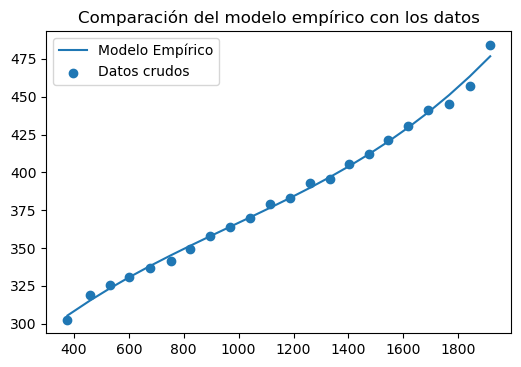

In [24]:
plt.figure(dpi=100)
plt.plot(tiempo,ajusTPoli)
plt.scatter(tiempo,temperatura)
plt.title('Comparación del modelo empírico con los datos')
plt.legend(['Modelo Empírico','Datos crudos'])
plt.savefig('ModeloEmpírico.png')
plt.show()

### Diagnósticos de los residuos para el modelo polinómico

#### Prueba de normalidad

Se observa que el coeficiente de Anderson-Darling calculado es menor al valor teórico con un $95\%$ de confianza, por lo que se acepta la normalidad de los residuos.

In [25]:
anderson(residuosEmpíricoPoli).statistic,anderson(residuosEmpíricoPoli).critical_values[2]

(0.41777808179304543, 0.696)

#### Gráficas de residuos

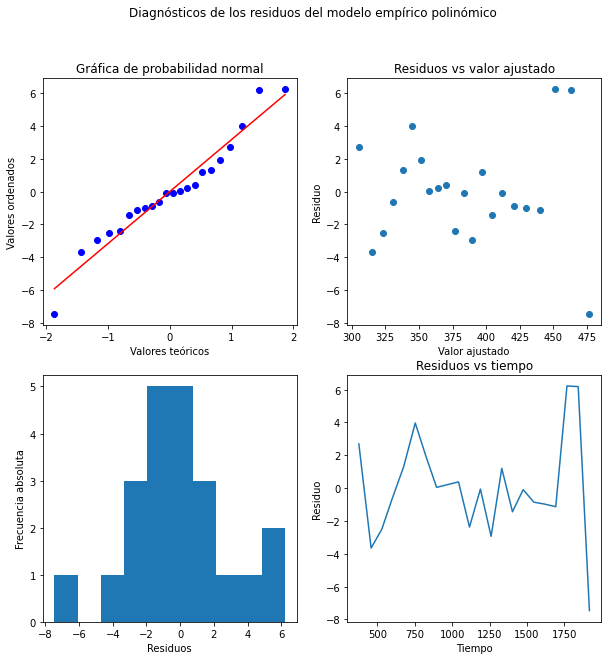

In [26]:
fig1,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
stats.probplot(residuosEmpíricoPoli,dist='norm',plot=ax1)
ax1.set_title('Gráfica de probabilidad normal')
ax1.set_xlabel('Valores teóricos')
ax1.set_ylabel('Valores ordenados')
ax2.scatter(ajusTPoli,residuosEmpíricoPoli)
ax2.set_title('Residuos vs valor ajustado')
ax2.set_ylabel('Residuo')
ax2.set_xlabel('Valor ajustado')
ax3.hist(residuosEmpíricoPoli)
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Frecuencia absoluta')
ax4.plot(tiempo,residuosEmpíricoPoli)
ax4.set_title('Residuos vs tiempo')
ax4.set_ylabel('Residuo')
ax4.set_xlabel('Tiempo')
fig1.suptitle('Diagnósticos de los residuos del modelo empírico polinómico')
plt.savefig('DiagnósticoEmpírico.png')
plt.show()

# Modelo teórico

## Balance de energía

Se define como volumen de control la muestra de hidrocarburos, se tiene entonces que:

$$V_{A}=F_{E}-F_{S}+V_{G}-V_{C}$$

* Velocidad de acumulación, $V_{A}=\frac{dM_{e}}{dt}$
* Flujo de entrada, $F_{E}=\dot{Q}$
* Flujo de salida, $F_{S}=\dot{M}_{S}\Delta H$
* Velocidad de generación, $R_{P}=0$
* Velocidad de consumo, $R_{C}=0$

$$\frac{dM_{e}}{dt}=\dot{Q}-\dot{M}_{S}\Delta H$$
$$\Rightarrow\frac{dMC\left(T-T_{ref}\right)}{dt}=\dot{Q}-\rho\dot{V}_{S}\Delta H$$
$$\Rightarrow\rho C\frac{dV\left(T-T_{ref}\right)}{dt}=\dot{Q}-\rho\dot{V}_{S}\Delta H$$
$$\Rightarrow\rho C\left(\left(T-T_{ref}\right)\frac{dV}{dt}+\frac{dT}{dt}V\right)=\dot{Q}-\rho\dot{V}_{S}\Delta H$$

### Balance de masa total

$$\frac{dM}{dt}=-\dot{M}_{s}$$
$$\Rightarrow \rho\frac{dV}{dt}=-\rho\dot{V}_{S}$$
$$\Rightarrow \frac{dV}{dt}=-\dot{V}_{S}$$

Integrando:

$$V=C_{1}-\dot{V}_{S}t$$

Como en $t=0$ se tiene que $V=V_{0}=100\textrm{ mL}$:

$$V=V_{0}-\dot{V}_{s}t$$
$$\Rightarrow \frac{dV}{dt}=-\dot{V}_{S}$$

### Sustitución

$$\Rightarrow\rho C\left(-\dot{V}_{S}\left(T-T_{ref}\right)+\frac{dT}{dt}\left(V_{0}-\dot{V}_{S}t\right)\right)=\dot{Q}-\rho\dot{V}_{S}\Delta H$$

Tomando $T_{ref}=0\textrm{ K}=-273.15\textrm{ °C}$ para la temperatura de referencia de la capacidad calorífica:

$$\Rightarrow\rho C\left(-\dot{V}_{S}\left(T-T_{ref}\right)+\frac{dT}{dt}\left(V_{0}-\dot{V}_{S}t\right)\right)=\dot{Q}-\rho\dot{V}_{S}\Delta H$$

Simplificando:

$$\frac{dT}{dt}-\frac{\dot{V}_{S}}{V_{0}-\dot{V}_{S}t}T=\frac{\dot{Q}-\rho\dot{V}_{S}\Delta H}{\rho C\left(V_{0}-\dot{V}_{S}t\right)}-\frac{\dot{V}_{S}}{V_{0}-\dot{V}_{S}t}T_{ref}$$

Tomando $\Delta H(t)=a+bt$:

$$\frac{dT}{dt}-\frac{\dot{V}_{S}}{V_{0}-\dot{V}_{S}t}T=\frac{\dot{Q}-\rho\dot{V}_{S}a-\rho\dot{V}_{S}bt}{\rho C\left(V_{0}-\dot{V}_{S}t\right)}-\frac{\dot{V}_{S}}{V_{0}-\dot{V}_{S}t}T_{ref}$$

Ahora se debe buscar la solución de esta expresión, para esto, se toma el factor integrante:

$$F_{I}(t)=\exp{\left(\int^{t}-\frac{\dot{V}_{S}}{V_{0}-\dot{V}_{S}t'}dt\right)}=V_{0}-\dot{V}_{S}t$$

Multilicando a ambos lados la ecuación por el factor integrante:

$$\left(V_{0}-\dot{V}_{S}t\right)\frac{dT}{dt}-\dot{V}_{S}T=\frac{\dot{Q}-\rho\dot{V}_{S}a-\rho\dot{V}_{S}bt}{\rho C}-\dot{V}_{S}T_{ref}$$

Esto se puede simplificar de la forma:

$$\frac{d}{dt}\left(\left(V_{0}-\dot{V}_{S}t\right)T\right)=\frac{\dot{Q}-\rho\dot{V}_{S}a-\rho\dot{V}_{S}bt}{\rho C}-\dot{V}_{S}T_{ref}$$

Integrando:

$$\left(V_{0}-\dot{V}_{S}t\right)T=\frac{\left(2\dot{Q}-2\rho\dot{V}_{S}a\right)t-\rho\dot{V}_{S}bt^2}{2\rho C}-\dot{V}_{S}T_{ref}t+C_{2}$$
$$\Rightarrow T=\frac{\left(2\dot{Q}-2\rho\dot{V}_{S}a\right)t-\rho\dot{V}_{S}bt^2}{2\rho C\left(V_{0}-\dot{V}_{S}t\right)}+\frac{C_{2}-\dot{V}_{S}T_{ref}t}{\left(V_{0}-\dot{V}_{S}t\right)}$$

En $t=t_{i}$, $T=T_{i}$, entonces:

$$T_{i}=\frac{2\left(\frac{\dot{Q}}{\rho}-\dot{V}_{S}a\right)t_{i}-\dot{V}_{S}bt_{i}^2}{2 CV_{0}-2 C\dot{V}_{S}t_{i}}+\frac{C_{2}-\dot{V}_{S}T_{ref}t_{i}}{\left(V_{0}-\dot{V}_{S}t_{i}\right)}$$
$$\Rightarrow T_{i}\left(V_{0}-\dot{V}_{S}t_{i}\right)-\frac{2\left(\frac{\dot{Q}}{\rho}-\dot{V}_{S}a\right)t_{i}-\dot{V}_{S}bt_{i}^2}{2C}+\dot{V}_{S}T_{ref}t_{i}=C_{2}$$
$$C_{2}=\frac{2CT_{i}\left(V_{0}-\dot{V}_{S}t_{i}\right)-2\left(\frac{\dot{Q}}{\rho}-\dot{V}_{S}a\right)t_{i}+\dot{V}_{S}bt_{i}^2+2C\dot{V}_{S}T_{ref}t_{i}}{2C}$$

Sustituyendo:

Si se trabaja en $K$:
$$T=\frac{2\left(\frac{\dot{Q}}{\rho}-\dot{V}_{S}a\right)t-\dot{V}_{S}bt^2}{2C\left(V_{0}-\dot{V}_{S}t\right)}+\frac{2CT_{i}\left(V_{0}-\dot{V}_{S}t_{i}\right)-2\left(\frac{\dot{Q}}{\rho}-\dot{V}_{S}a\right)t_{i}+\dot{V}_{S}bt_{i}^2+2C\dot{V}_{S}T_{ref}t_{i}-2C\dot{V}_{S}T_{ref}t}{2C\left(V_{0}-\dot{V}_{S}t\right)}$$

Pero en Celsius:
$$T=\frac{2\left(\frac{\dot{Q}}{\rho}-\dot{V}_{S}a\right)t-\dot{V}_{S}bt^2}{2C\left(V_{0}-\dot{V}_{S}t\right)}+\frac{2CT_{i}\left(V_{0}-\dot{V}_{S}t_{i}\right)-2\left(\frac{\dot{Q}}{\rho}-\dot{V}_{S}a\right)t_{i}+\dot{V}_{S}bt_{i}^2}{2C\left(V_{0}-\dot{V}_{S}t\right)}$$

In [27]:
volumen=np.asarray(datosCorrida2['Volumen evaporado, %']).astype('float64')

In [28]:
V0=100
ti=tiempo.min()
Ti=temperatura.min()
Tref=-273.15

In [29]:
def Volumen(t,Vs):
    return V0-Vs*t

In [30]:
coefsV,covV=sopt.curve_fit(Volumen,tiempo,(V0-volumen))
ajusV=Volumen(tiempo,coefsV[0])
residuosVolumen=ajusV-volumen

In [31]:
Vs=coefsV[0]
Vs

0.04814015187978919

In [32]:
def Teórico(t,Q,a,rho,b,C):
    return ((2*(Q/rho-Vs*a)*t-b*Vs*t**2)/(2*C*V0-2*C*Vs*t))+(2*C*Ti*(V0-Vs*ti)-2*(Q/rho-Vs*a)*ti+Vs*b*ti**2)/(2*C*(V0-Vs*t))

In [33]:
coefsT,covT=sopt.curve_fit(Teórico,tiempo,temperatura)
ajusT=Teórico(tiempo,coefsT[0],coefsT[1],coefsT[2],coefsT[3],coefsT[4])
residuosTeórico=ajusT-temperatura

In [34]:
coefsT

array([-6.00600563e+01,  3.88062156e+02, -3.99019709e+00,  2.34475527e-01,
        1.21015590e+00])

In [35]:
se2T=(residuosTeórico**2).sum()/(len(residuosTeórico)-5)
se2T

18.75683862621506

In [36]:
sm2T=se2T-sd2
sm2T

18.75683862621506

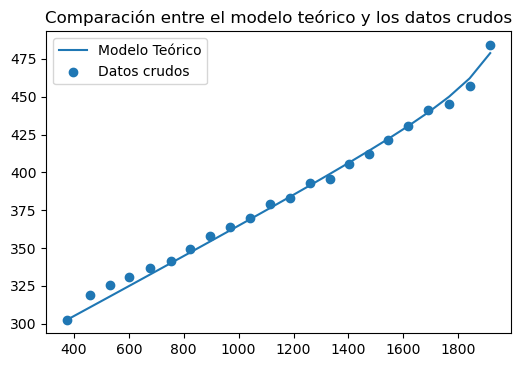

In [37]:
plt.figure(dpi=100)
plt.plot(tiempo,ajusT)
plt.scatter(tiempo,temperatura)
plt.legend(['Modelo Teórico','Datos crudos'])
plt.title('Comparación entre el modelo teórico y los datos crudos')
plt.savefig('ModeloTeórico.png')
plt.show()

In [38]:
anderson(residuosTeórico).statistic,anderson(residuosTeórico).critical_values

(0.19565596895740356, array([0.51 , 0.58 , 0.696, 0.812, 0.966]))

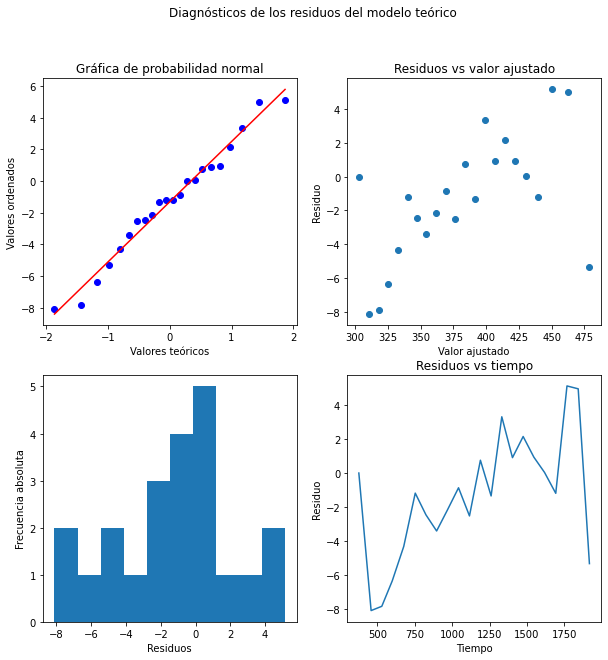

In [39]:
fig4,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
stats.probplot(residuosTeórico,dist='norm',plot=ax1)
ax1.set_title('Gráfica de probabilidad normal')
ax1.set_xlabel('Valores teóricos')
ax1.set_ylabel('Valores ordenados')
ax2.scatter(ajusT,residuosTeórico)
ax2.set_title('Residuos vs valor ajustado')
ax2.set_ylabel('Residuo')
ax2.set_xlabel('Valor ajustado')
ax3.hist(residuosTeórico)
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Frecuencia absoluta')
ax4.plot(tiempo,residuosTeórico)
ax4.set_title('Residuos vs tiempo')
ax4.set_ylabel('Residuo')
ax4.set_xlabel('Tiempo')
fig4.suptitle('Diagnósticos de los residuos del modelo teórico')
plt.savefig('DiagnósticoTeórico.png')
plt.show()

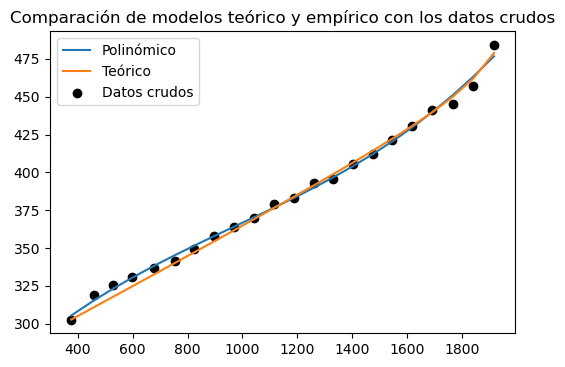

In [40]:
plt.figure(dpi=100)
plt.scatter(tiempo,temperatura,color='black')
plt.plot(tiempo,ajusTPoli)
plt.plot(tiempo,ajusT)
plt.legend(['Polinómico','Teórico','Datos crudos'])
plt.title('Comparación de modelos teórico y empírico con los datos crudos')
plt.savefig('AmbosModelos.png')
plt.show()

In [41]:
F_calc=se2T**2/se2P**2
F_calc

3.114822122734343

Se tiene que el $F$ teórico para dos muestras con $22$ grados de libertad al $99\%$ de confianza es $2.785$, entonces, como el $F_{calc}$ calculado es menor al estadístico $F$ teórico, se puede concluir que los modelos son estadísticamente iguales al $99\%$ de confianza.

# Ajustando para todas las corridas experimentales



In [42]:
tiempo1,temp1=np.asarray(datosCorrida1['tiempo, s']).astype('float64'),np.asarray(datosCorrida1['Temperatura de destilación, °C']+273.15).astype('float64')
tiempo2,temp2=tiempo.copy(),temperatura.copy()
tiempo3,temp3=np.asarray(datosCorrida3['tiempo']).astype('float64'),np.asarray(datosCorrida3['Temperatura de destilación']+273.15).astype('float64')
tiempo4,temp4=np.asarray(datosCorrida4['tiempo']).astype('float64'),np.asarray(datosCorrida4['Temperatura de destilación']+273.15).astype('float64')

In [43]:
sd2=((temp1-temp1.mean()).sum()**2+(temp2-temp2.mean()).sum()**2+(temp2-temp2.mean()).sum()**2+(temp2-temp2.mean()).sum()**2)/(4*(len(temp1)-1))
sd2

2.773424579849019e-26

In [44]:
volumen1=np.asarray(datosCorrida1['Volumen evaporado, %']).astype('float64')
volumen2=volumen.copy()
volumen3=np.asarray(datosCorrida3['Volumen evaporado, %']).astype('float64')
volumen4=np.asarray(datosCorrida4['Volumen evaporado, %']).astype('float64')

In [45]:
tiempo=np.concatenate((tiempo1,tiempo2,tiempo3,tiempo4))
temperatura=np.concatenate((temp1,temp2,temp3,temp4))
volumen=np.concatenate((volumen1,volumen2,volumen3,volumen4))
corridas=[[volumen[i],tiempo[i],temperatura[i]]for i in range(len(tiempo))]
corridas.sort(key = lambda x:x[1])

In [46]:
corridas=np.array(corridas)

In [47]:
corrida_avg=[]
for i in range(int(len(corridas)/4)):
    j=i*4
    k=j+4
    corrida_avg.append([corridas[j:k,0].mean(),corridas[j:k,1].mean(),corridas[j:k,2].mean()])
corrida_avg=np.array(corrida_avg)

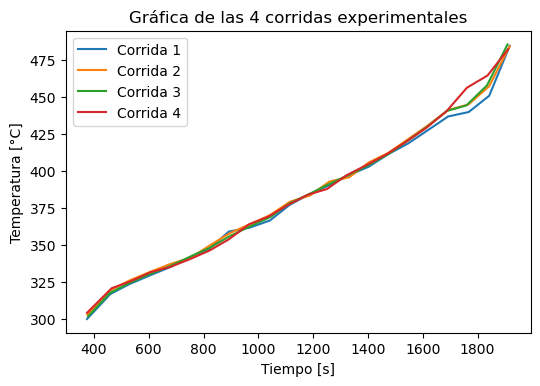

In [48]:
plt.figure(dpi=100)
plt.plot(tiempo1,temp1)
plt.plot(tiempo2,temp2)
plt.plot(tiempo3,temp3)
plt.plot(tiempo4,temp4)
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [°C]')
plt.legend(['Corrida 1','Corrida 2','Corrida 3','Corrida 4'])
plt.title('Gráfica de las 4 corridas experimentales')
plt.savefig('CorridasJuntas.png')
plt.show()

## Modelo empírico

In [49]:
coefsP,covP=sopt.curve_fit(TPolinomio,corrida_avg[:,1],corrida_avg[:,2])
ajusTPoli=TPolinomio(corrida_avg[:,1],coefsP[0],coefsP[1],coefsP[2],coefsP[3])
residuosEmpíricoPoli=ajusTPoli-corrida_avg[:,2]

In [50]:
coefsP

array([ 3.89370612e-08, -1.12953604e-04,  1.94721666e-01,  2.45069774e+02])

In [51]:
se2Poli=(residuosEmpíricoPoli**2).sum()/(len(residuosEmpíricoPoli)-5)
se2Poli

9.571219594025841

In [52]:
sm2Poli=se2Poli-sd2
sm2Poli

9.571219594025841

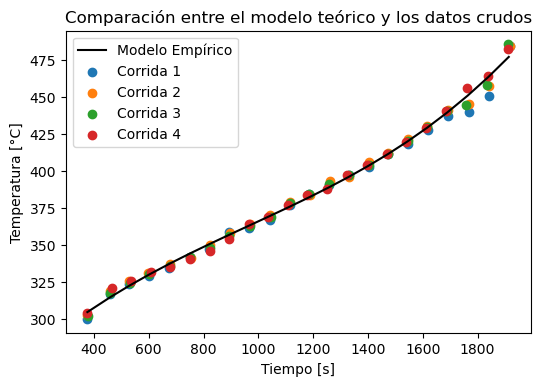

In [53]:
plt.figure(dpi=100)
plt.plot(corrida_avg[:,1],ajusTPoli,color='black')
plt.scatter(tiempo1,temp1)
plt.scatter(tiempo2,temp2)
plt.scatter(tiempo3,temp3)
plt.scatter(tiempo4,temp4)
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [°C]')
plt.legend(['Modelo Empírico','Corrida 1','Corrida 2','Corrida 3','Corrida 4'])
plt.title('Comparación entre el modelo teórico y los datos crudos')
plt.savefig('ModeloEmpíricovsCorridas.png')
plt.show()

In [54]:
anderson(residuosEmpíricoPoli).statistic,anderson(residuosEmpíricoPoli).critical_values

(0.4142495421360728, array([0.51 , 0.58 , 0.696, 0.812, 0.966]))

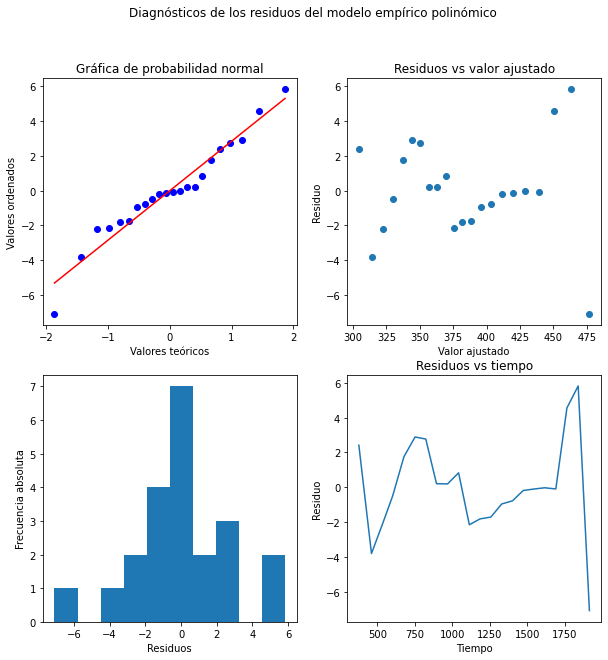

In [55]:
fig1,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
stats.probplot(residuosEmpíricoPoli,dist='norm',plot=ax1)
ax1.set_title('Gráfica de probabilidad normal')
ax1.set_xlabel('Valores teóricos')
ax1.set_ylabel('Valores ordenados')
ax2.scatter(ajusTPoli,residuosEmpíricoPoli)
ax2.set_title('Residuos vs valor ajustado')
ax2.set_ylabel('Residuo')
ax2.set_xlabel('Valor ajustado')
ax3.hist(residuosEmpíricoPoli)
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Frecuencia absoluta')
ax4.plot(corrida_avg[:,1],residuosEmpíricoPoli)
ax4.set_title('Residuos vs tiempo')
ax4.set_ylabel('Residuo')
ax4.set_xlabel('Tiempo')
fig1.suptitle('Diagnósticos de los residuos del modelo empírico polinómico')
plt.savefig('DiagnósticoEmpíricoCorridas.png')
plt.show()

## Modelo teórico

In [56]:
V0=100
ti=np.min(corrida_avg[:,1])
Ti=np.min(corrida_avg[:,2])

In [57]:
coefsV,covV=sopt.curve_fit(Volumen,corrida_avg[:,1],(V0-corrida_avg[:,0]))
ajusV=Volumen(corrida_avg[:,1],coefsV[0])
residuosVolumen=ajusV-corrida_avg[:,0]

In [58]:
Vs=coefsV[0]
Vs

0.04820363377053804

In [59]:
coefsT,covT=sopt.curve_fit(Teórico,corrida_avg[:,1],corrida_avg[:,2])
ajusT=Teórico(corrida_avg[:,1],coefsT[0],coefsT[1],coefsT[2],coefsT[3],coefsT[4])
residuosTeórico=ajusT-corrida_avg[:,2]

In [60]:
coefsT

array([-3.3696019 , 59.01984088,  1.91559634,  0.29718101,  1.53736949])

In [61]:
se2T=(residuosTeórico**2).sum()/(len(residuosTeórico)-1)
se2T

12.50232733830369

In [62]:
sm2T=se2T-sd2
sm2T

12.50232733830369

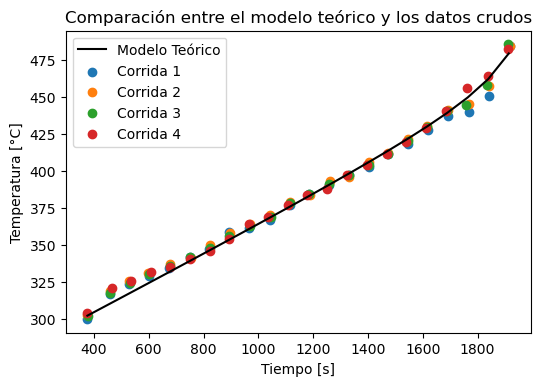

In [63]:
plt.figure(dpi=100)
plt.plot(corrida_avg[:,1],ajusT,color='black')
plt.scatter(tiempo1,temp1)
plt.scatter(tiempo2,temp2)
plt.scatter(tiempo3,temp3)
plt.scatter(tiempo4,temp4)
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [°C]')
plt.legend(['Modelo Teórico','Corrida 1','Corrida 2','Corrida 3','Corrida 4'])
plt.title('Comparación entre el modelo teórico y los datos crudos')
plt.savefig('ModeloTeóricovsCorridas.png')
plt.show()

In [64]:
anderson(residuosTeórico).statistic,anderson(residuosTeórico).critical_values

(0.2681318211769188, array([0.51 , 0.58 , 0.696, 0.812, 0.966]))

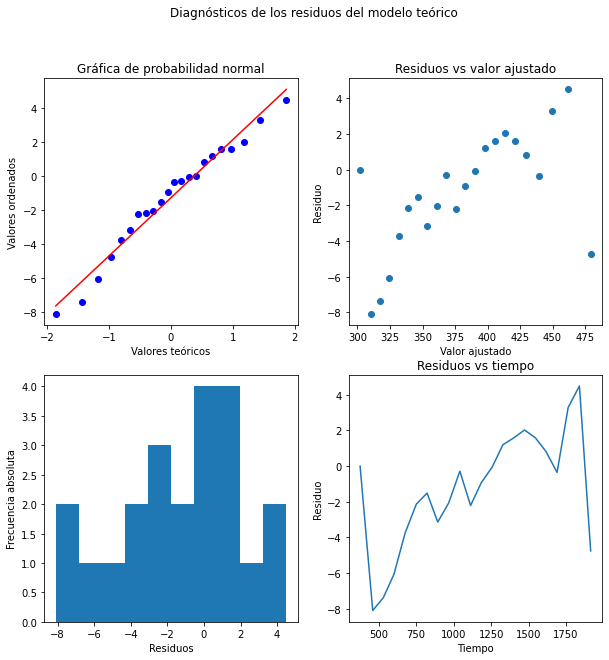

In [65]:
fig4,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
stats.probplot(residuosTeórico,dist='norm',plot=ax1)
ax1.set_title('Gráfica de probabilidad normal')
ax1.set_xlabel('Valores teóricos')
ax1.set_ylabel('Valores ordenados')
ax2.scatter(ajusT,residuosTeórico)
ax2.set_title('Residuos vs valor ajustado')
ax2.set_ylabel('Residuo')
ax2.set_xlabel('Valor ajustado')
ax3.hist(residuosTeórico)
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Frecuencia absoluta')
ax4.plot(corrida_avg[:,1],residuosTeórico)
ax4.set_title('Residuos vs tiempo')
ax4.set_ylabel('Residuo')
ax4.set_xlabel('Tiempo')
fig4.suptitle('Diagnósticos de los residuos del modelo teórico')
plt.savefig('DiagnósticoTeóricoCorridas.png')
plt.show()